In [22]:
from datasets import ImageDataSet, CroppedOutImageDataSet
from skimage import io
import os
from os.path import join
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np
import torch
import dill as pkl

# Creating a simple Dataloader from our dataset and displaying the results

In [23]:
root_dir = 'data'
ImageDataset = ImageDataSet(root_dir)

TypeError: object of type 'type' has no len()

In [25]:
dataloader = DataLoader(ImageDataset, batch_size=1, shuffle=True)

In [26]:
len(dataloader)

27398

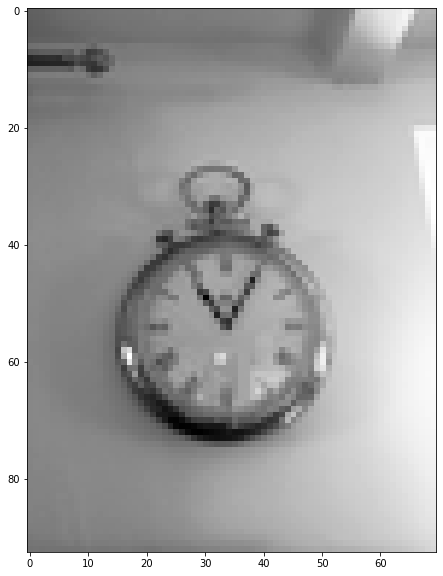

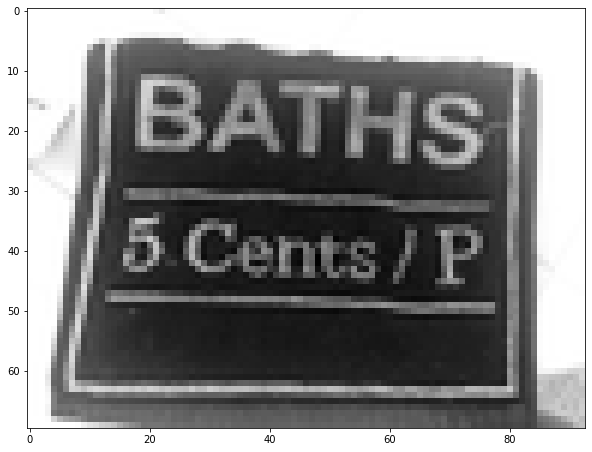

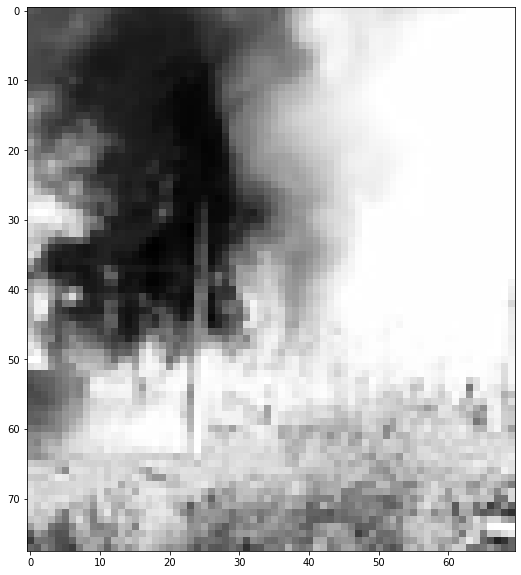

In [4]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 4:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
    if i_batch == 7:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
    if i_batch == 42:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
        break

# Testing the Dataset, which delievers cropped out images

In [5]:
Croppeddataloader = DataLoader(CroppedOutImageDataSet(ImageDataset), batch_size=1, shuffle=True)

In [6]:
# Function to visualize the contents of a batch
def visualize_batch(batch):
    fig, axs = plt.subplots(1,5,figsize=(30,5))
    data = np.moveaxis(batch[0].numpy(), 0, -1)
    fig.suptitle(f'Data-ID:{sample_batched[2].numpy()}')
    axs[0].imshow(np.squeeze(data)[0,...], cmap= 'Greys_r')
    axs[0].set_title('cropped image')
    axs[1].imshow(np.squeeze(data)[1,...], cmap= 'Greys_r')
    axs[1].set_title('cropped area')
    axs[2].imshow(np.squeeze(data)[2,...])
    axs[2].set_title('x-coordinate')
    axs[3].imshow(np.squeeze(data)[3,...])
    axs[3].set_title('y-coordinate')
    axs[4].imshow(np.squeeze(batch[1]),cmap= 'Greys_r')
    axs[4].set_title('target')
    plt.show()

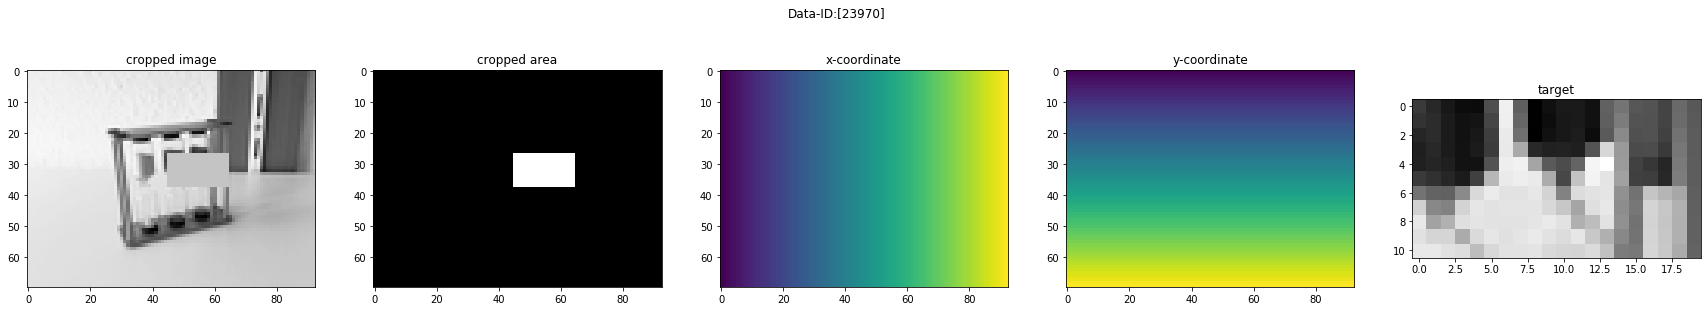

In [10]:
for i_batch, sample_batched in enumerate(Croppeddataloader):
    if i_batch == 4:
        visualize_batch(sample_batched)
        break

In [8]:
target_device = 'cuda'

n = 0
for data in Croppeddataloader:
        inputs, targets, ids = data
        inputs = inputs.to(target_device)
        targets = targets.to(target_device)
        n+=1
        if(n%100 == 0):
            print(n)

100
200
300
400
500
600


KeyboardInterrupt: 

In [12]:
testSetPath = 'challenge_testset.pkl'
with open(testSetPath,'rb') as tsp:
    testSet = pkl.load(tsp)

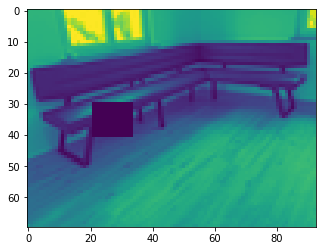

In [37]:
plt.imshow(np.array(testSet['images'][149]))

In [30]:
len(testSet['images'])

250

In [17]:
from time import gmtime, strftime

In [18]:
print(datetime.datetime.now())

2020-07-09 15:35:03.934194


In [21]:
strftime("%Y-%m-%d,%H:%M:%S", gmtime())

'2020-07-09,13:35:16'